In [1]:
"""
This code belongs to the paper:
-- Y.C. Mathpati, K.S. More, T. Tripura, R. Nayek, S. Chakraborty (2023)
   MAntRA: A framework for model agnostic reliability analysis
   
-- This code is for 5-DOF linear structural system with tuned mass damper.
"""

'\nThis code belongs to the paper:\n-- Y.C. Mathpati, K.S. More, T. Tripura, R. Nayek, S. Chakraborty (2023)\n   MAntRA: A framework for model agnostic reliability analysis\n   \n-- This code is for 5-DOF linear structural system with tuned mass damper.\n'

In [1]:
def dof2sys(x1, x2, x3, x4,x5,x6,x7,x8,x9,x10,x_d1,x_d2, T):
    # parameters of 2-DOF in Equation
    # ---------------------------------------------
    m1, m2,m3,m4,m5,m_d = 1, 1, 1, 1, 1, 0.1
    k1, k2,k3,k4,k5,k_d = 1000, 1500,2000,2500,3000,300
    c1, c2,c3,c4,c5,c_d = 2, 2,2,2,2,0.2
    sigma1, sigma2,sigma3,sigma4,sigma5 = 1, 1,1,1,1
    
    # solution by Taylor 1.5 strong scheme Run with dt=0.01
    # -------------------------------------------------------
    T = 1
    dt = 0.001
    t = np.arange(0, T+dt, dt)
    Nsamp = 200 #int(1/dt) # no. of samples in the run
    
    y1 = []
    y2 = []
    y3 = []
    y4 = []
    y5 = []
    y6 = []
    y7 = []
    y8 = []
    y9 = []
    y10 = []
    y_d1 = []
    y_d2= []
   
    xz1 = []
    xz2 = []
    xz3 = []
    xz4 = []
    xz5 = []
    xz6 = []
    
    xzs11 = []
    xzs22 = []
    xzs33 = []
    xzs44 = []
    xzs55 = []
    xzs66 = []
    # Simulation Starts Here ::
    # -------------------------------------------------------
    for ensemble in range(Nsamp):
        x0 = np.array([x1, x2, x3, x4,x5,x6,x7,x8,x9,x10,x_d1,x_d2])
        x = x0  # Zero initial condition.
        for n in range(len(t)-1):
            dW = np.sqrt(dt)*np.random.randn(6)
            dW1 = dW[0]
            dW2 = dW[1]
            dW3 = dW[2]
            dW4 = dW[3]
            dW5 = dW[4]
            dW6 = dW[5]
            
            a1 = x0[1]
            a2 = -(c1/m1)*x0[1]-(k1/m1)*x0[0] \
                -(c2/m1)*(x0[1]-x0[3])-(k2/m1)*(x0[0]-x0[2])
            a3 = x0[3]
            a4 = -(c2/m2)*(x0[3]-x0[1])-(k2/m2)*(x0[2]-x0[0]) \
                -(c3/m2)*(x0[3]-x0[5])-(k3/m2)*(x0[2]-x0[4])
            
#             a4 = -(c2/m2)*(x0[3]-x0[1])-(k2/m2)*(x0[2]-x0[0])
            a5 = x0[5]
            a6 = -(c3/m3)*(x0[5]-x0[3])-(k3/m3)*(x0[4]-x0[2]) \
                -(c4/m3)*(x0[5]-x0[7])-(k4/m3)*(x0[4]-x0[6])
            
            a7 = x0[7]
            a8 = -(c4/m4)*(x0[7]-x0[5])-(k4/m4)*(x0[6]-x0[4]) \
                -(c5/m4)*(x0[7]-x0[9])-(k5/m4)*(x0[6]-x0[8])
            
            a9 = x0[9]
            a10 = -(c5/m5)*(x0[9]-x0[7])-(k5/m5)*(x0[8]-x0[6]) \
                -(c5/m5)*(x0[9]-x0[11])-(k5/m5)*(x0[8]-x0[10])
            
            a11 = x0[11]
            a12 = -(c_d/m_d)*(x0[11]-x0[9])-(k_d/m_d)*(x0[10]-x0[8])
            


            b1 = 0
            b2 = (sigma1)/m1
            b3 = 0
            b4 = (sigma2)/m2
            b5 = 0
            b6 = (sigma3)/m3
            b7 = 0
            b8 = (sigma4)/m4
            b9 = 0
            b10 = (sigma5)/m5
            b11 = 0
            b12 = 0          
            
            sol1 = x0[0] + a1*dt
            sol2 = x0[1] + a2*dt + b2*dW1
            sol3 = x0[2] + a3*dt
            sol4 = x0[3] + a4*dt + b4*dW2
            sol5 = x0[4] + a5*dt
            sol6 = x0[5] + a6*dt + b6*dW1
            sol7 = x0[6] + a7*dt
            sol8 = x0[7] + a8*dt + b8*dW2
            sol9 = x0[8] + a9*dt
            sol10 = x0[9] + a10*dt + b10*dW1
            sol11 = x0[10] + a11*dt
            sol12 = x0[11] + a12*dt + b12*dW2
            
            x0 = np.array([sol1, sol2, sol3, sol4,sol5, sol6, sol7, sol8,sol9, sol10, sol11, sol12])
            x = np.column_stack((x, x0))
            
        y1.append(x[0,:])
        y2.append(x[1,:])
        y3.append(x[2,:])
        y4.append(x[3,:])
        y5.append(x[4,:])
        y6.append(x[5,:])
        y7.append(x[6,:])
        y8.append(x[7,:])
        y9.append(x[8,:])
        y10.append(x[9,:])
        y_d1.append(x[10,:])
        y_d2.append(x[11,:])
        
        zint1 = x[1, 0:-1]
        xfinal1 = x[1, 1:] 
        xmz1 = (xfinal1 - zint1) # 'x1(t)-z1' vector
        zint2 = x[3, 0:-1]
        xfinal2 = x[3, 1:] 
        xmz2 = (xfinal2 - zint2) # 'x2(t)-z2' vector
        zint3 = x[5, 0:-1]
        xfinal3 = x[5, 1:] 
        xmz3 = (xfinal3 - zint3) # 'x1(t)-z1' vector
        zint4 = x[7, 0:-1]
        xfinal4 = x[7, 1:] 
        xmz4 = (xfinal4 - zint4) # 'x2(t)-z2' vector
        zint5 = x[9, 0:-1]
        xfinal5 = x[9, 1:] 
        xmz5 = (xfinal5 - zint5) # 'x1(t)-z1' vector
        zint6 = x[11, 0:-1]
        xfinal6 = x[11, 1:] 
        xmz6 = (xfinal6 - zint6) # 'x2(t)-z2' vector

        
        xz1.append(xmz1)
        xz2.append(xmz2)
        xz3.append(xmz3)
        xz4.append(xmz4)
        xz5.append(xmz5)
        xz6.append(xmz6)
        
        xmzsq11 = np.multiply(xmz1, xmz1)
        xzs11.append(xmzsq11)
        
        xmzsq22 = np.multiply(xmz2, xmz2)
        xzs22.append(xmzsq22)
        
        xmzsq33 = np.multiply(xmz3, xmz3)
        xzs33.append(xmzsq33)
        
        xmzsq44 = np.multiply(xmz4, xmz4)
        xzs44.append(xmzsq44)
        
        xmzsq55 = np.multiply(xmz5, xmz5)
        xzs55.append(xmzsq55)
        
        xmzsq66 = np.multiply(xmz6, xmz6)
        xzs66.append(xmzsq66)
        
    xz1 = pow(dt,-1)*np.mean(np.array(xz1), axis = 0)
    xz2 = pow(dt,-1)*np.mean(np.array(xz2), axis = 0)
    xz3 = pow(dt,-1)*np.mean(np.array(xz3), axis = 0)
    xz4 = pow(dt,-1)*np.mean(np.array(xz4), axis = 0)
    xz5 = pow(dt,-1)*np.mean(np.array(xz5), axis = 0)
    xz6 = pow(dt,-1)*np.mean(np.array(xz6), axis = 0)
    
    xzs11 = pow(dt,-1)*np.mean(np.array(xzs11), axis = 0)
    xzs22 = pow(dt,-1)*np.mean(np.array(xzs22), axis = 0)
    xzs33 = pow(dt,-1)*np.mean(np.array(xzs33), axis = 0)
    xzs44 = pow(dt,-1)*np.mean(np.array(xzs44), axis = 0)
    xzs55 = pow(dt,-1)*np.mean(np.array(xzs55), axis = 0)
    xzs66 = pow(dt,-1)*np.mean(np.array(xzs66), axis = 0)
    
    y1 = np.array(y1)
    y2 = np.array(y2)
    y3 = np.array(y3)
    y4 = np.array(y4)
    y5 = np.array(y5)
    y6 = np.array(y6)
    y7 = np.array(y7)
    y8 = np.array(y8)
    y9 = np.array(y9)
    y10 = np.array(y10)
    y11 = np.array(y_d1)
    y12 = np.array(y_d2)
    time = t[0:-1]
    
    return xz1, xz2,xz3, xz4,xz5, xz6, xzs11, xzs22, xzs33,xzs44, xzs55, xzs66, y1, y2, y3, y4,y5, y6, y7, y8,y9, y10, y11, y12, time


In [2]:
def library(xt, polyn, harmonic):
    if polyn == 0:
        polyn = 1
    
    # The polynomial is (x1 + x2)^p, with p is the order
    # poly order 0
    ind = 0
    n = len(xt[0])
    D = np.ones([n,1])
    
    if polyn >= 1:
        # poly order 1
        for i in range(len(xt)):
            ind = ind+1
            new = np.vstack(xt[i,:])
            D = np.append(D, new, axis=1)
    if polyn >= 2: 
        # ploy order 2
        for i in range(len(xt)):
            for j in  range(i,len(xt)):
                ind = ind+1
                new = np.multiply(xt[i,:], xt[j,:])
                new = np.vstack(new)
                D = np.append(D, new, axis=1) 
    if polyn >= 3:    
        # ploy order 3
        for i in range(len(xt)):
            for j in  range(i,len(xt)):
                for k in  range(j,len(xt)):
                    ind = ind+1
                    new = np.multiply(np.multiply(xt[i,:], xt[j,:]), xt[k,:])
                    new = np.vstack(new)
                    D = np.append(D, new, axis=1) 
    if polyn >= 4:
        # ploy order 4
        for i in range(len(xt)):
            for j in  range(i,len(xt)):
                for k in  range(j,len(xt)):
                    for l in range(k,len(xt)):
                        ind = ind+1
                        new = np.multiply(np.multiply(xt[i,:], xt[j,:]), xt[k,:])
                        new = np.multiply(new, xt[l,:])
                        new = np.vstack(new)
                        D = np.append(D, new, axis=1) 
    if polyn >= 5:
        # ploy order 5
        for i in range(len(xt)):
            for j in  range(i,len(xt)):
                for k in  range(j,len(xt)):
                    for l in  range(k,len(xt)):
                        for m in  range(l,len(xt)):
                            ind = ind+1
                            new = np.multiply(xt[i,:], xt[j,:])
                            
                            new = np.multiply(new, xt[k,:])
                            new = np.multiply(new, xt[l,:])
                            new = np.multiply(new, xt[m,:])
                            new = np.vstack(new)
                            D = np.append(D, new, axis=1) 
    if polyn >= 6:
        # ploy order 6
        for i in range(len(xt)):
            for j in  range(i,len(xt)):
                for k in  range(j,len(xt)):
                    for l in  range(k,len(xt)):
                        for m in  range(l,len(xt)):
                            for n in  range(m,len(xt)):
                                ind = ind+1
                                new = np.multiply(xt[i,:], xt[j,:])
                                new = np.multiply(new, xt[k,:])
                                new = np.multiply(new, xt[l,:])
                                new = np.multiply(new, xt[m,:])
                                new = np.multiply(new, xt[n,:])
                                new = np.vstack(new)
                                D = np.append(D, new, axis=1) 
    # for the signum or sign operator
#     for i in range(len(xt)):
#         ind = ind+1
#         new = np.vstack(np.sign(xt[i,:]))+0.0001
#         D = np.append(D, new, axis=1)
    
#     # for the modulus operator
#     for i in range(len(xt)):
#         ind = ind+1
#         new = np.vstack(abs(xt[i,:]))
#         D = np.append(D, new, axis=1)
#     # for the tensor operator
#     for i in range(len(xt)):
#         for j in  range(len(xt)):
#             ind = ind+1
#             new = np.multiply(xt[i,:],abs(xt[j,:]))
#             new = np.vstack(new)
#             D = np.append(D, new, axis=1)
#     if harmonic == 1:
        # for sin(x)
        for i in range(len(xt)):
            ind = ind+1
            new = np.vstack(np.sin(xt[i,:]))
            D = np.append(D, new, axis=1)
            #  or,
            # ind = ind+1
            # new = np.sin(xt[i,:])
            # D = np.insert(D, ind, new, axis=1)
        # for cos(x)
        for i in range(len(xt)):
            ind = ind+1
            new = np.vstack(np.cos(xt[i,:]))
            D = np.append(D, new, axis=1)
    # ind = ind+1
    
    # D = D[:, 0:7] 
    ind = len(D[0])
    return D, ind


In [3]:
import numpy as np
from numpy import linalg as LA
from numpy.random import gamma as IG
from numpy.random import beta
from numpy.random import binomial as bern
import fun_library0
import fun_gibbs
import fun_resp_stochastic
from numpy.random import multivariate_normal as mvrv
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

# %%

"""
--------->>>>>>> Identification of Drift 1
"""

T = 1

# Response generation:
x1, x2, x3, x4,x5,x6,x7,x8,x9,x10,x_d1,x_d2 = 0.1, 0, 0.01, 0,0.01, 0, 0.01, 0,0.01, 0, 0.01, 0  # initial displacement for 2dof
xdrift1, xdrift2,xdrift3, xdrift4,xdrift5, xdrift6, xdiff11, xdiff22, xdiff33,xdiff44, xdiff55, xdiff66,\
y1, y2, y3, y4,y5, y6, y7, y8,y9, y10, y_d1, y_d2, t_eval = dof2sys(x1, x2, x3, x4,x5,x6,x7,x8,x9,x10,x_d1,x_d2,T)

# Expected Dictionary Creation:
libr = []
for j in range(len(y1)):
    data = np.row_stack((y1[j,0:-1], y2[j,0:-1], y3[j,0:-1], y4[j,0:-1],y5[j,0:-1], y6[j,0:-1], y7[j,0:-1], y8[j,0:-1],y9[j,0:-1], y10[j,0:-1], y_d1[j,0:-1], y_d2[j,0:-1]))
    Dtemp, nl = library(data, 2, 0)
    libr.append(Dtemp)
libr = np.array(libr)
D= np.mean(libr, axis = 0)


In [4]:
D.shape

(1000, 91)

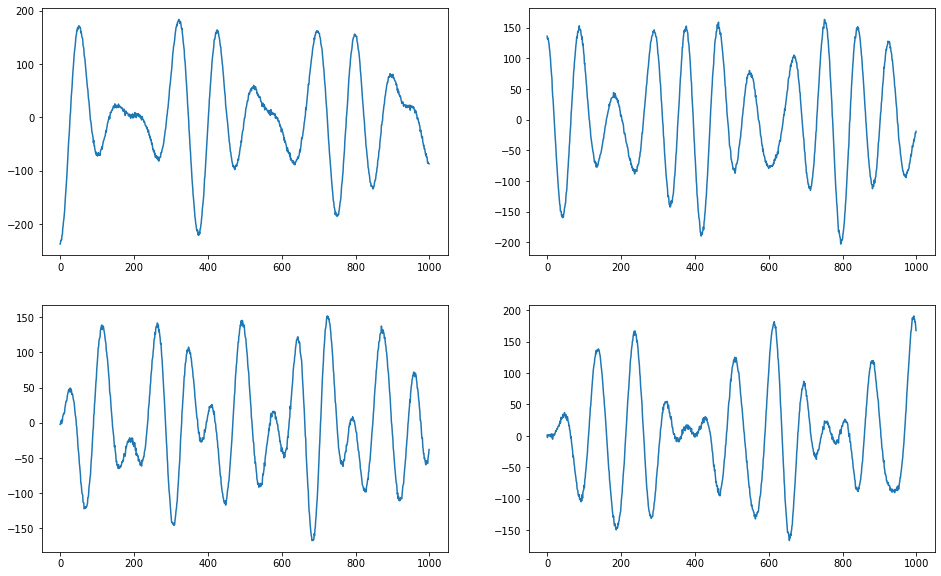

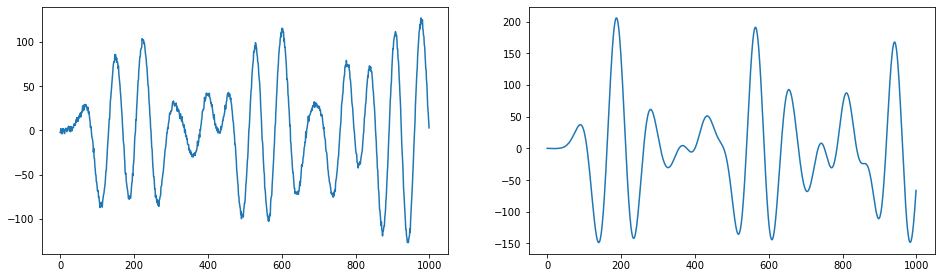

In [5]:
plt.figure(figsize = (16,10))
plt.subplot(2,2,1)
plt.plot(xdrift1)
plt.subplot(2,2,2)
plt.plot(xdrift2)
plt.subplot(2,2,3)
plt.plot(xdrift3)
plt.subplot(2,2,4)
plt.plot(xdrift4)
plt.figure(figsize = (16,10))
plt.subplot(2,2,1)
plt.plot(xdrift5)
plt.subplot(2,2,2)
plt.plot(xdrift6)

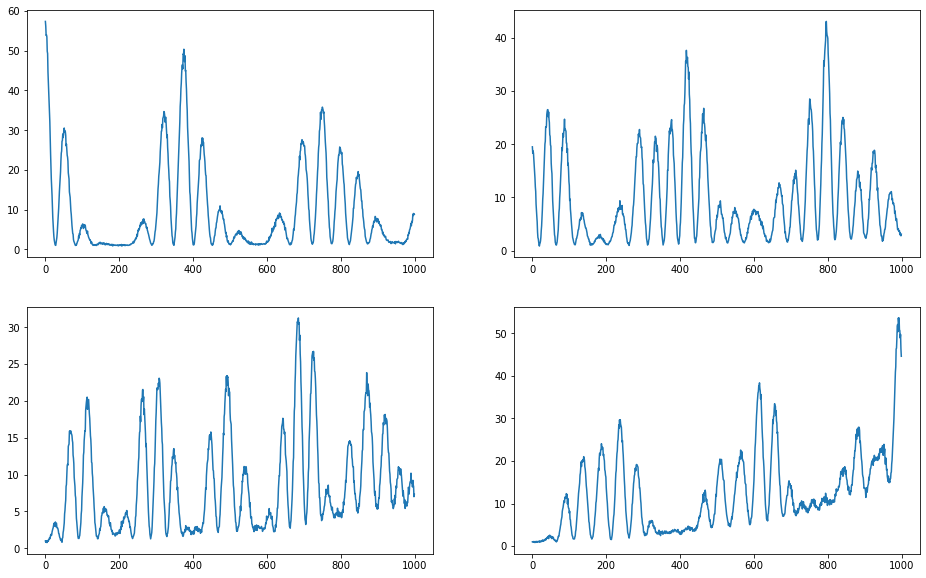

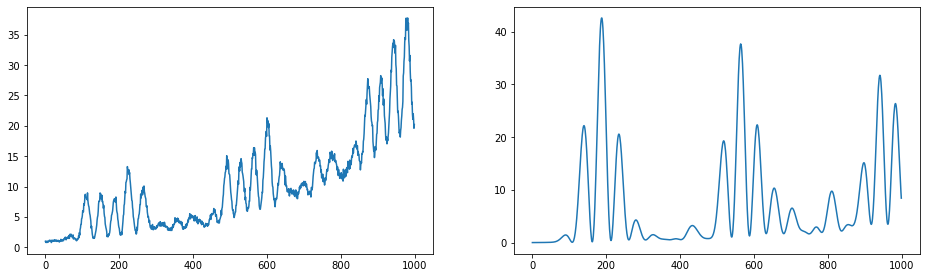

In [6]:
plt.figure(figsize = (16,10))
plt.subplot(2,2,1)
plt.plot(xdiff11)
plt.subplot(2,2,2)
plt.plot(xdiff22)
plt.subplot(2,2,3)
plt.plot(xdiff33)
plt.subplot(2,2,4)
plt.plot(xdiff44)
plt.figure(figsize = (16,10))
plt.subplot(2,2,1)
plt.plot(xdiff55)
plt.subplot(2,2,2)
plt.plot(xdiff66)

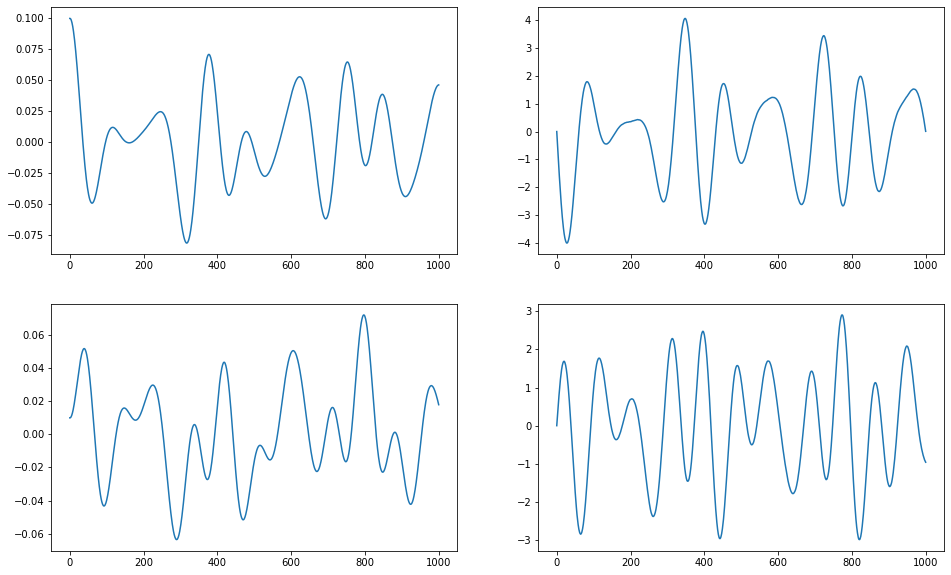

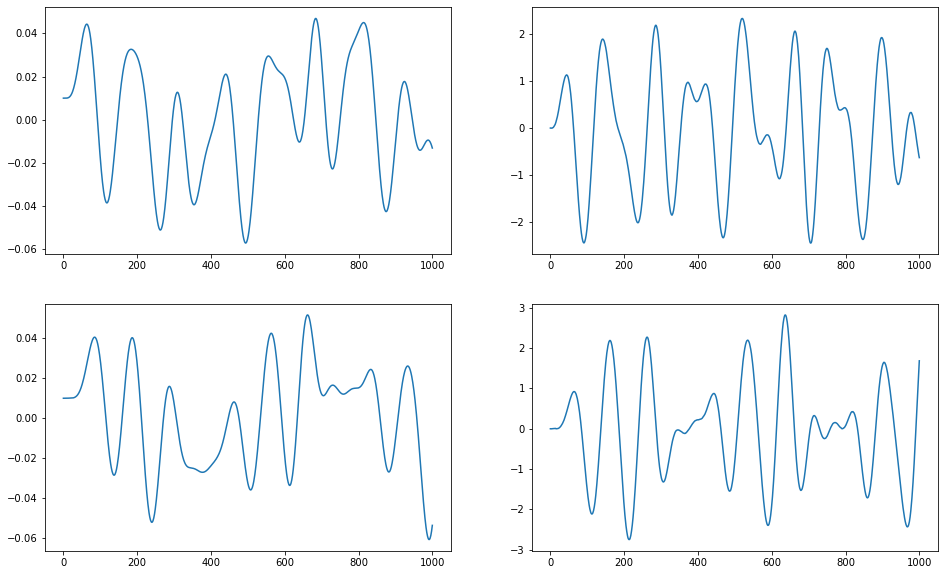

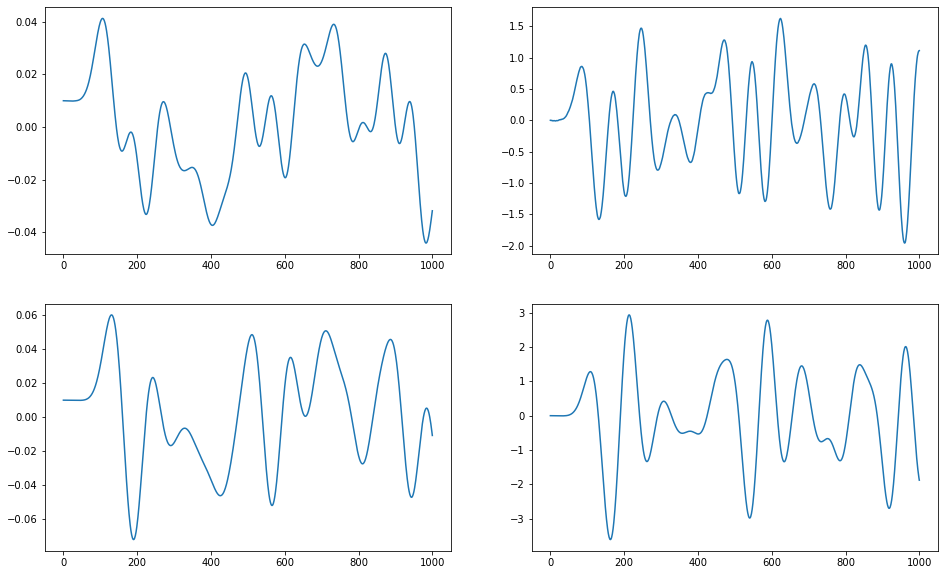

In [7]:
plt.figure(figsize = (16,10))
plt.subplot(2,2,1)
plt.plot(np.mean(y1,axis=0))
plt.subplot(2,2,2)
plt.plot(np.mean(y2,axis=0))
plt.subplot(2,2,3)
plt.plot(np.mean(y3,axis=0))
plt.subplot(2,2,4)
plt.plot(np.mean(y4,axis=0))
plt.figure(figsize = (16,10))
plt.subplot(2,2,1)
plt.plot(np.mean(y5,axis=0))
plt.subplot(2,2,2)
plt.plot(np.mean(y6,axis=0))
plt.subplot(2,2,3)
plt.plot(np.mean(y7,axis=0))
plt.subplot(2,2,4)
plt.plot(np.mean(y8,axis=0))
plt.figure(figsize = (16,10))
plt.subplot(2,2,1)
plt.plot(np.mean(y9,axis=0))
plt.subplot(2,2,2)
plt.plot(np.mean(y10,axis=0))
plt.subplot(2,2,3)
plt.plot(np.mean(y_d1,axis=0))
plt.subplot(2,2,4)
plt.plot(np.mean(y_d2,axis=0))

In [8]:
# Bayesian Interference:
# D, xdts, muD, sdvD = fun_library0.BayInt(D, xdt)
xdts = xdrift5

Dict = D.reshape(-1,order='F')
Dict.shape

#!/usr/bin/env python
"""
Sample script that uses the SparseBayes module created using
MATLAB Compiler SDK.

Refer to the MATLAB Compiler SDK documentation for more information.
"""

from __future__ import print_function
import SparseBayes
import matlab

my_SparseBayes = SparseBayes.initialize()

DictIn = matlab.double(Dict, size=(D.shape[0], D.shape[1]))
targetIn = matlab.double(xdts, size=(D.shape[0], 1))
DMOut = my_SparseBayes.SparseBayes(DictIn, targetIn)
print(DMOut, sep='\n')

my_SparseBayes.terminate()



{'Relevant': matlab.double([[2.0],[4.0],[8.0],[9.0],[10.0],[11.0],[12.0],[13.0],[24.0],[30.0],[42.0],[47.0],[78.0],[86.0]]), 'Value': matlab.double([[-2.779949801984385],[3.6596586009406646],[3001.09757596732],[2.1850962553212305],[-5996.183661193722],[-3.7606876994546425],[2997.5422350767053],[2.1444201884459226],[-132.6566251102477],[-0.0340386644403345],[-2.5475205749101693],[-0.06096577799751911],[-8.485897018222115],[0.1793299021832957]])}


In [9]:
c = np.array(DMOut['Value'])
d = []
for j in c:
    d.append(j[0])
    

initz0_1 = np.zeros(D.shape[1])

a = np.array(DMOut['Relevant'])
b = []
for i in a:
    b.append(int((i[0])-1))

for i in b:
    initz0_1[i] = 1
    
import warnings
import math
import numpy as np
import scipy as sp
import sympy as smp
from scipy import stats
from numpy import linalg as la
import matplotlib.pyplot as plt
from numpy.random import gamma
from scipy.special import loggamma

def Variational_Bayes_Code(X, y, initz0, tol, verbosity):

    if (len(X) == 0 or len(y) == 0):
        raise Exception('X and or y is missing')
        
    if (len(X) != len(y)):
        raise Exception('Number of observations do not match')
        
    X = stats.zscore(X, ddof = 1)         
    X = np.c_[np.ones(len(X)),X]          
    y = y - np.mean(y)
    N = len(X)
    # Prior parameters of noise variance (Inverse Gamma dist)
    A = 1e-4
    B = 1e-4
    vs = 10
    tau0 = 1000
    
    if (len(initz0) == 0):
        raise Exception('No initial value of z found')
    else:
        p0 = expit(-0.5*(np.sqrt(N)))       
        
        # Adding the intercept indicator variable (slightly less than 1 to prevent log(0) values) 
        initz = np.hstack((1,initz0))   

        DS,LLcvg  = run_VB2(X, y, vs, A, B, tau0, p0, initz, tol, verbosity)    
        # This is function which will come first
        
    out_vb   = DS
    a = DS['zmean'] > 0.5
    count = 0
    modelIdx = []
    for i in a:
        if i == True:
            modelIdx.append(count)
        count += 1
            
    modelIdx = np.setdiff1d(modelIdx,0)
    out_vb['modelIdx'] = modelIdx-1
    out_vb['Zmed'] = DS['zmean'][modelIdx]
    out_vb['Wsel'] = DS['wmean'][modelIdx]
    out_vb['Wcov'] = DS['wCOV'][modelIdx, modelIdx]
    out_vb['sig2'] = DS['sig2']
    
    return out_vb

DS = {}
def run_VB2(Xc, yc, vs, A, B, tau0, p0, initz, tol, verbosity):
    """This function is the implementation of VB from John T. Ormerod paper (2014)
       This implementation uses slab scaling by noise variance
       vs    : treated as a constant
       A,B   : constants of the IG prior over noise variance
       tau0  : Expected value of (sigma^{-2})
       p0    : inclusion probablility
       initz : Initial value of z
       Xc    : Centered and standardized dictionary except the first column
       yc    : Centered observations """
    
    Lambda    = logit(p0)
    iter_     = 0
    max_iter  = 100
    LL        = np.zeros(max_iter)        
    zm        = np.reshape(initz,(-1))            
    taum      = tau0                      
    invVs     = 1/vs
    
    X = Xc
    y = yc
    XtX = (X.T) @ X
    XtX = 0.5*(XtX + (XtX).T)
    Xty = (X.T) @ y                 
    yty = (y.T) @ y

    eyep = np.eye(len(XtX))
    [N,p] = X.shape
    allidx = np.arange(p)
    zm[0] = 1                                                                   # Always include the intercept 
    Abar    = (A + 0.5*N + 0.5*p)
    converged = 0
    
    while (converged==0):
        if (iter_==100):
            break
        
        Zm       = np.diag(zm)
        Omg      = (np.reshape(zm,(-1,1)) @ np.reshape(zm,(1,-1))) + (Zm @ (eyep-Zm))
        # Update the mean and covariance of the coefficients given mean of z
        term1    = XtX * Omg                                                       # elementwisw multiplication
        invSigma = taum * (term1 + invVs * eyep)
        invSigma = 0.5*(invSigma + invSigma.T)                                     # symmetric
        Sigma    = la.inv(invSigma) @ eyep
        mu       = taum * (Sigma @ Zm @ Xty)                                       # @ ---> matrix multiplication
        
        # Update tau related to sigma
        term2    = 2 * Xty @ Zm @ mu
        term3    =  np.reshape(mu,(len(initz0)+1,1)) @ np.reshape(mu,(1,len(initz0)+1))+ Sigma
        term4    = yty - term2 + np.trace((term1 + invVs * eyep) @ term3)    
        s        = B + 0.5*term4
        
        if s<0:
            warnings.warn('s turned out be less than 0. Taking absolute value')
            s = B + 0.5*abs(term4)
        
        taum     = Abar / s
        zstr   = zm

        order   = np.setdiff1d(np.random.permutation(p), 0, assume_unique=True)
        for j in order: 
            muj     = mu[j]                            
            sigmaj  = Sigma[j,j]
            
            remidx  = np.setdiff1d(allidx,j)
            mu_j    = mu[remidx]
            Sigma_jj= Sigma[remidx,j]
            etaj    = (Lambda - 0.5 * taum * ((muj**2 + sigmaj) * XtX[j,j]) 
                       + taum * np.reshape(X[:,j],(1,-1)) @ (np.reshape(y,(-1,1))*muj 
                        -X[:,remidx] @ np.diag(zstr[remidx]) @ ((mu_j * muj + Sigma_jj).reshape(-1,1))))
            zstr[j] = expit(etaj)
            
        zm = zstr
        
        # Calculate marginal log-likelihood
        
        LL[iter_] = ( 0.5*p 
                    - 0.5*N*np.log(2*np.pi) 
                    + 0.5*p*np.log(invVs) 
                    + A*np.log(B)
                    - loggamma(A)
                    + loggamma(Abar) 
                    - Abar*np.log(s)
                    + 0.5*np.log(la.det(Sigma))
                    + np.nansum(zm*(np.log(p0) - np.log(zm))) 
                    + np.nansum((1-zm)*(np.log(1-p0) - np.log(1-zm))))
        
        if(verbosity):
            print(f'Iteration = {iter_}  log(Likelihood) = {LL[iter_]}')
        
        if(iter_>1):
            cvg = LL[iter_] - LL[iter_-1]
            
            if (cvg < 0 and verbosity):
                print('OOPS!  log(like) decreasing!!')
            elif (cvg<tol or iter_> max_iter):
                converged = 1
                LL = LL[0:iter_]
                
        iter_    = iter_ + 1
    DS['zmean'] = zm
    DS['wmean'] = mu
    DS['wCOV'] = Sigma
    DS['sig2'] = 1/taum
    LLcvg    = LL[-1]
    return DS, LLcvg
    
def logit(C):
    logitC = np.log(C) - np.log(1-C)
    return logitC

def expit(C):
    expitC = 1./(1 + np.exp(-C))
    return expitC

D_std = np.std(D[:,1:],axis = 0)
D_std1 = D_std.reshape(1,-1)

D1 = D*np.diag(1/D_std1)

In [10]:
X = D1[:,1:]
y = xdts
initz0 = initz0_1[1:]
tol = 0.0001
verbosity = True
DS = Variational_Bayes_Code(X, y, initz0, tol, verbosity)
print(DS)

C:\Users\hp\AppData\Local\Temp\ipykernel_11452\1776271751.py:161: RuntimeWarning: divide by zero encountered in log
  + np.nansum((1-zm)*(np.log(1-p0) - np.log(1-zm))))
C:\Users\hp\AppData\Local\Temp\ipykernel_11452\1776271751.py:161: RuntimeWarning: invalid value encountered in multiply
  + np.nansum((1-zm)*(np.log(1-p0) - np.log(1-zm))))


Iteration = 0  log(Likelihood) = -2980.314440424848


C:\Users\hp\AppData\Local\Temp\ipykernel_11452\1776271751.py:188: RuntimeWarning: overflow encountered in exp
  expitC = 1./(1 + np.exp(-C))
C:\Users\hp\AppData\Local\Temp\ipykernel_11452\1776271751.py:160: RuntimeWarning: divide by zero encountered in log
  + np.nansum(zm*(np.log(p0) - np.log(zm)))
C:\Users\hp\AppData\Local\Temp\ipykernel_11452\1776271751.py:160: RuntimeWarning: invalid value encountered in multiply
  + np.nansum(zm*(np.log(p0) - np.log(zm)))


Iteration = 1  log(Likelihood) = -2596.1855843793137
Iteration = 2  log(Likelihood) = -2595.7844326911486
Iteration = 3  log(Likelihood) = -2595.782925710943
Iteration = 4  log(Likelihood) = -2595.7829152857116
{'zmean': array([1., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0.]), 'wmean': array([-7.27772290e-14,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  7.50829376e+01,
        2.58652959e+00, -1.22841095e+02, -2.97070712e+00,  9.14905991e+01,
        2.78928056e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.0

3000.373170311368
2.1048303373421335
-5995.495819377055
-3.8194925684762455
2999.900440031714
2.0837874724757675


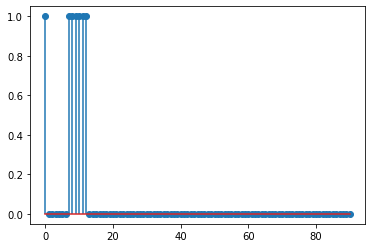

In [11]:
plt.stem(DS['zmean'])   

for i in DS["modelIdx"]:
    print((((DS["wmean"][1:]) / (D_std))).reshape(-1)[i])
    

In [12]:
xdts = xdiff55
Dict = D.reshape(-1,order='F')
Dict.shape


#!/usr/bin/env python
"""
Sample script that uses the SparseBayes module created using
MATLAB Compiler SDK.

Refer to the MATLAB Compiler SDK documentation for more information.
"""

from __future__ import print_function
import SparseBayes
import matlab

my_SparseBayes = SparseBayes.initialize()

DictIn = matlab.double(Dict, size=(D.shape[0], D.shape[1]))
targetIn = matlab.double(xdts, size=(D.shape[0], 1))
DMOut = my_SparseBayes.SparseBayes(DictIn, targetIn)
print(DMOut, sep='\n')

my_SparseBayes.terminate()


c = np.array(DMOut['Value'])
d = []
for j in c:
    d.append(j[0])
    

initz0_1 = np.zeros(D.shape[1])

a = np.array(DMOut['Relevant'])
b = []
for i in a:
    b.append(int((i[0])-1))

for i in b:
    initz0_1[i] = 1

D_std = np.std(D[:,1:],axis = 0)
D_std1 = D_std.reshape(1,-1)

D1 = D*np.diag(1/D_std1)

X = D1[:,1:]
y = xdts
initz0 = initz0_1[1:]
tol = 0.0001
verbosity = True
DS = Variational_Bayes_Code(X, y, initz0, tol, verbosity)
print(DS)

{'Relevant': matlab.double([[1.0],[9.0],[18.0],[25.0],[54.0],[61.0],[67.0],[71.0],[72.0],[73.0],[74.0],[75.0],[76.0],[78.0],[80.0],[82.0],[83.0],[84.0],[85.0],[86.0],[87.0],[88.0],[89.0],[90.0]]), 'Value': matlab.double([[0.9581384340718503],[0.0029459259693101958],[1.7819213677600159],[0.666937702840891],[0.4499141756089188],[-2.1483994337820045],[-0.9684122572219831],[8993.876930213131],[16.090147108019586],[-36004.600150505015],[-23.584540366697013],[18063.1466428042],[16.186630920540097],[-25.809318563044027],[14.736855288530997],[35926.55328914632],[44.148297368941165],[-35990.464191676605],[-26.514386772637902],[0.045589459936807714],[-23.77922967969123],[-0.02935479836083302],[9029.93070391454],[15.168885486295224]])}


C:\Users\hp\AppData\Local\Temp\ipykernel_11452\1776271751.py:161: RuntimeWarning: divide by zero encountered in log
  + np.nansum((1-zm)*(np.log(1-p0) - np.log(1-zm))))
C:\Users\hp\AppData\Local\Temp\ipykernel_11452\1776271751.py:161: RuntimeWarning: invalid value encountered in multiply
  + np.nansum((1-zm)*(np.log(1-p0) - np.log(1-zm))))
C:\Users\hp\AppData\Local\Temp\ipykernel_11452\1776271751.py:188: RuntimeWarning: overflow encountered in exp
  expitC = 1./(1 + np.exp(-C))


Iteration = 0  log(Likelihood) = -1700.4200343875486


C:\Users\hp\AppData\Local\Temp\ipykernel_11452\1776271751.py:160: RuntimeWarning: divide by zero encountered in log
  + np.nansum(zm*(np.log(p0) - np.log(zm)))
C:\Users\hp\AppData\Local\Temp\ipykernel_11452\1776271751.py:160: RuntimeWarning: invalid value encountered in multiply
  + np.nansum(zm*(np.log(p0) - np.log(zm)))


Iteration = 1  log(Likelihood) = -1441.5839771885878
Iteration = 2  log(Likelihood) = -1438.4935013100137
Iteration = 3  log(Likelihood) = -1438.492006032779
Iteration = 4  log(Likelihood) = -1438.4919956887752
{'zmean': array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 1., 1., 1., 1., 1., 0., 1., 0., 1., 0., 1., 1., 1., 1.,
       0., 1., 0., 1., 1., 0.]), 'wmean': array([ 6.14699582e-14,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.0

8891.56322055568
16.76353290839717
-35393.080512416105
-25.897516451648517
17762.674016646244
14.360917242644247
-27.508313078040874
16.217820214212562
35388.901968445665
48.46268807719254
-35348.874248181244
-25.91745336284466
-24.77534651499148
8888.437646580369
14.513745771700716


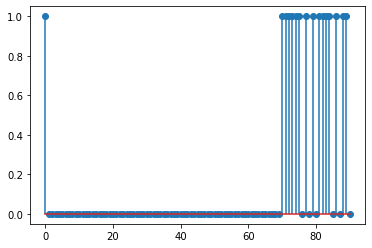

In [13]:
plt.stem(DS['zmean'])   

for i in DS["modelIdx"]:
    print((((DS["wmean"][1:]) / (D_std))).reshape(-1)[i])